# Individual Project about Movie Dataset #

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf


## Movie dataset ##

<img class="irc_mi" src="https://miro.medium.com/max/1400/1*N0-ikjPv4RUVvS-6KCgLPg.jpeg" onload="typeof google==='object'&amp;&amp;google.aft&amp;&amp;google.aft(this)" width="304" height="228" style="margin-top: 66px;" data-iml="1561494466736" alt="Image result for geert hofstede">
Photo by: Netflix

Code by: Google

Data from: Kaggle & TMDB

In [3]:
movies = pd.read_csv("moviesdata.csv")
movies.shape

(8482, 21)

## Research Questions ##
### 1.What are some of the features of the "successful" movies? ###
### 2. Is movie popularity a better representation for success of movie than the movies score? ###
### 3. What is the performance of the classifer with higher accuracy? ###

In [4]:
#define "financial successful" in my own way
#if the movie makes 2 times its budget, I will consider it as successful
movies['profit'] = movies['revenue'] - movies['budget']
profit = movies['revenue'] - 2*movies['budget']
new_profit = []
for i in profit:
    if i >= 0:
        new_profit.append(1)
    else:
        new_profit.append(0)
        
movies['success'] = new_profit

In [5]:
# To make the vote_average fair, I also take into account how many people are voting
# Thus, I use a weighted average, represented by "average_score"

movies['average_score'] = 0.999*movies['vote_average'] + 0.001 * movies['vote_count']

## Part 1 Features about "successful" movies

In [6]:
#create a dataframe containing only "successful" movies
s_movies = movies[movies['success'] == 1]

In [7]:
lst = s_movies['genres'].value_counts()
lst = lst.head(15)

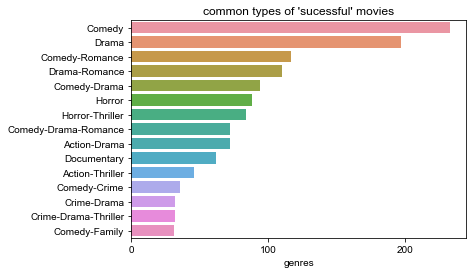

In [8]:
#create a barplot representing common types of "successful" movies
sns.barplot(x=lst, y = lst.index, orient = "h").set(title = "common types of 'sucessful' movies")
sns.set(rc={'figure.figsize':(13,11)})
sns.set(font_scale = 3)

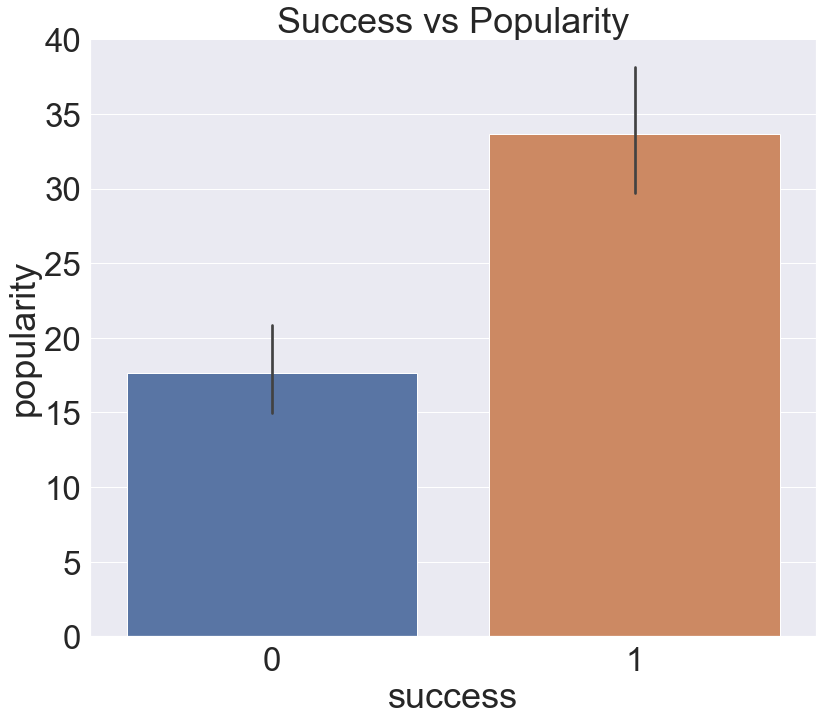

In [11]:
sns.barplot(x="success", y='popularity', data=movies).set(title='Success vs Popularity')
sns.set(font_scale = 2);

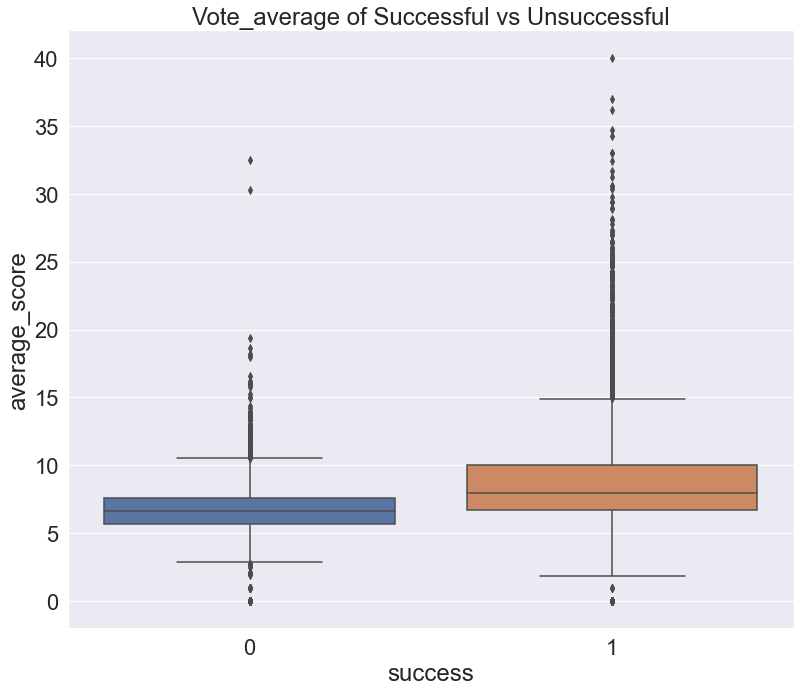

In [12]:
sns.boxplot(y="average_score", x = "success", data=movies).set(title='Vote_average of Successful vs Unsuccessful');


### Part 1 Features of the Successful movies conclusion ###
1. Comedies, drama and comedy-romance are the most common three genres 
2. Successful movies tend to be more popular
3. Successful movies tend to have higher average_score


### Part 2 Building Classifiers ###

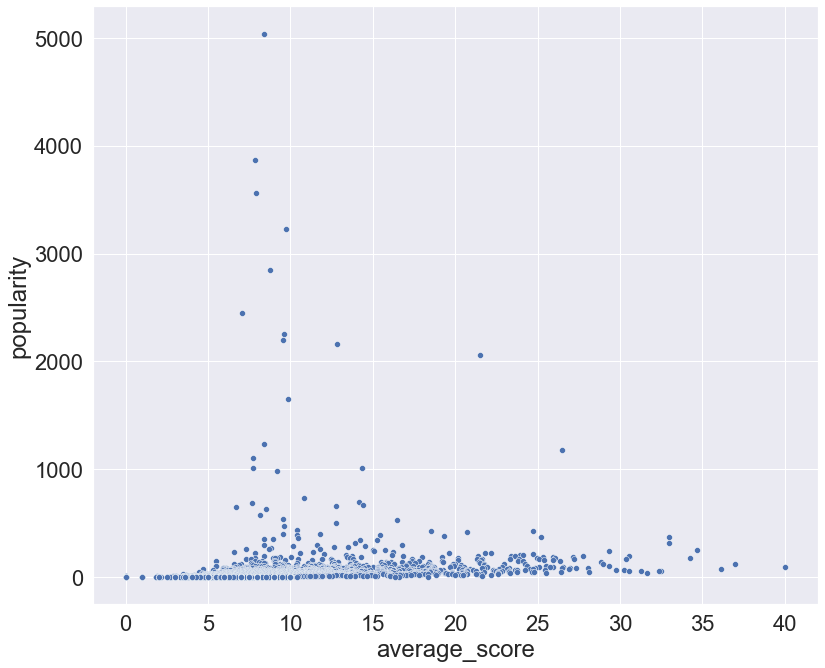

In [13]:
# Before building the classifer, first test the colinearity
sns.scatterplot(x="average_score", y = "popularity", data = movies);

In [14]:
# Get the correlation between vote_average and popularity
movies['average_score'].corr(movies['popularity'])

0.18010514570064337

The correlation suggest these two variables are not highly correlatted. Thus it makes sense for us to find which one is better

In [15]:
# Define our features/target
X = movies[["popularity"]]
# Target data['target'] = 0 is malignant, 1 is benign
Y = movies['success']

In [16]:
# Create a 75-25 train-test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

Training Data Size: 6361
Test Data Size: 2121


In [17]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')

lr.fit(x_train,y_train) 
train_accuracy = np.mean(y_train == lr.predict(x_train))
test_accuracy = np.mean(y_test == lr.predict(x_test))

print(f"Train accuracy for popularity: {train_accuracy:.4f}")
print(f"Test accuracy for populaity: {test_accuracy:.4f}")

Train accuracy for popularity: 0.5840
Test accuracy for populaity: 0.5898


In [18]:
# Define our features/target
X = movies[["average_score"]]
# Target data['target'] = 0 is malignant, 1 is benign
Y = movies['success']
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


In [19]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')

lr.fit(x_train,y_train) 
train_accuracy = np.mean(y_train == lr.predict(x_train))
test_accuracy = np.mean(y_test == lr.predict(x_test))

print(f"Train accuracy for average_score: {train_accuracy:.4f}")
print(f"Test accuracy for average_score: {test_accuracy:.4f}")

Train accuracy for average_score: 0.6516
Test accuracy for average_score: 0.6624


/var/folders/wj/kt7wp1v54lb254f9k5p3jj5w0000gn/T/ipykernel_16558/2675827050.py:17: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



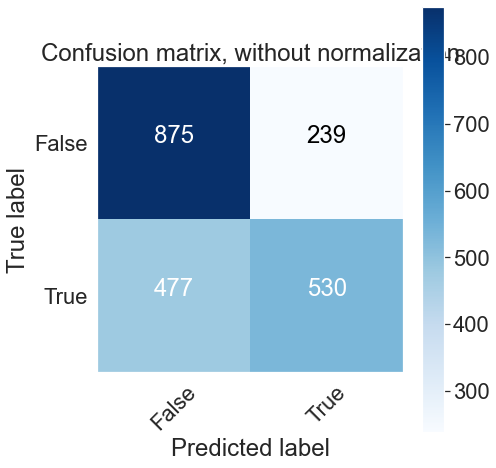

In [20]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, lr.predict(x_test))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure(figsize = (7,7))
plt.grid(False)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


In [21]:
y_pred = lr.predict(x_test) 

TP = np.sum((y_pred == y_test) & (y_test == 1))
FP = np.sum((y_pred != y_test) & (y_test == 0))
FN = np.sum((y_pred != y_test) & (y_test == 1))
TN = np.sum((y_pred == y_test) & (y_test == 0))

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.6892
recall = 0.5263


### Part 2 Classifier conclusion ###
1. The average score and popularity are very weakly correlated.
2. The classifier has higher accuracy when using average_score. Average_score is thus a better representation of whether a movie is successful or not. This might suggest some interesting phenomenon in the real world. Maybe popular movies spent more budget on marketing so it is not as succssful. Or people are more willing to pay for what they enjoy compared to what is trendy.
3. The classifier with Average_score has accuracy 0.6624, precision 0.6992 and recall 0.5263